In [1]:
quantification_dict = {0: 158, 1033: 29, 728: 60, 846: 8, 91: 19, 7: 3, 773: 2, 951: 1, 711: 1, 989: 11, 372: 1, 202: 72, 512: 37, 209: 2, 616: 45, 984: 67, 867: 148, 534: 7, 658: 11, 612: 2, 313: 205, 1047: 1, 1070: 2, 957: 1, 136: 11, 970: 5, 1048: 23, 976: 158, 866: 7, 850: 12, 147: 2, 145: 34, 771: 60, 898: 61, 1093: 19, 820: 78, 811: 46, 795: 438, 280: 4, 326: 31, 1052: 67, 128: 238, 661: 1, 828: 14, 17: 129, 26: 76, 246: 14, 10: 18, 924: 9, 381: 22, 997: 7, 32767: 33, 797: 75, 178: 3, 81: 8, 108: 9, 1009: 6, 477: 42, 301: 3, 551: 10, 559: 10, 187: 3, 651: 2, 169: 11, 354: 6, 912: 1, 62: 6, 1043: 8, 162: 25, 318: 2, 604: 1, 42: 19, 140: 123, 146: 35, 214: 4, 863: 7, 374: 5, 215: 7, 544: 15, 672: 46, 638: 2, 852: 10, 880: 8, 872: 12, 679: 6, 812: 1, 842: 1, 67: 1, 697: 6, 210: 3, 194: 45, 685: 14, 364: 7, 262: 1, 625: 2, 998: 6, 217: 3, 1091: 7, 350: 2, 798: 1, 460: 2, 681: 1, 231: 2, 35: 1, 336: 1, 12: 2, 634: 1, 50: 2, 186: 41, 595: 3, 690: 1, 1097: 50, 1004: 7, 980: 11, 946: 5, 830: 3, 610: 4, 648: 15, 478: 1, 6: 13, 803: 17, 351: 25, 226: 29, 56: 42, 844: 2, 767: 69, 656: 2, 962: 30, 1007: 3, 445: 2, 749: 4, 158: 2, 118: 2, 129: 2, 443: 1, 362: 20, 802: 1, 575: 7, 64: 2, 549: 6, 88: 7, 943: 11, 523: 28, 258: 2, 342: 39, 1101: 15, 630: 31, 482: 2, 271: 2, 834: 2, 851: 1, 804: 6, 1: 9, 436: 2, 434: 1, 449: 1, 38: 1, 515: 19, 181: 2, 30: 1, 133: 1, 1109: 8, 1015: 7, 1021: 8, 488: 3, 412: 15, 448: 8, 328: 4, 1064: 3, 1029: 2, 580: 1, 422: 1, 102: 2, 614: 2, 356: 1, 965: 2, 906: 1, 774: 3, 914: 1, 263: 1, 72: 1, 266: 1, 272: 1, 363: 21, 304: 5, 707: 7, 171: 7, 211: 2, 827: 5, 556: 5, 620: 4, 698: 14, 608: 1, 1125: 6, 288: 27, 969: 16, 159: 1, 1079: 1, 1031: 1, 670: 1, 1128: 3, 403: 5, 298: 12, 908: 1, 596: 1, 814: 1, 935: 1, 484: 1, 131: 2, 303: 5, 1022: 2, 23: 5, 268: 1, 1108: 1, 956: 9, 1054: 2, 1081: 1, 582: 1, 1090: 2, 1035: 1, 754: 1, 440: 4, 961: 1, 188: 1, 806: 3, 873: 1, 289: 1, 450: 1, 320: 1, 783: 1, 800: 6, 667: 2, 68: 1, 344: 2, 1058: 1, 163: 2, 120: 1}

## setup atlas

In [2]:
import json
from parse_ara import *
import networkx as nx 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from pyvis.network import Network

## Create vikram's object

In [3]:

f = json.load(open('/Users/thomasathey/Documents/mimlab/mouselight/brainlit_parent/brainlit/experiments/deisseroth/ara_structure_ontology.json','r'))

tree = build_tree(f)
stack = [tree]
dfs_node_list = [] #node ids ordered by dfs
reg_to_name = {} #map from id to name

while len(stack) > 0:
    node = stack.pop()

    if node.id in quantification_dict.keys():
        reg_to_name[node.id] = node.name
        dfs_node_list.append(node.id)
    
    if len(node.children) > 0:
        stack[0:0] = node.children

quantification_dict_ordered = {}
for id in dfs_node_list:
    if id not in quantification_dict.keys():
        continue
    try:
        roi_name = reg_to_name[id]
    except:
        roi_name = "Missing Name #" + str(id)
    quantification_dict_ordered[roi_name] = quantification_dict[id]

for vol_key in quantification_dict.keys():
    if vol_key not in reg_to_name.keys():
        roi_name = "Unknown Name #" + str(vol_key)
        quantification_dict_ordered[roi_name] = quantification_dict[id]

## create nx graph

In [4]:
queue = [tree]
cur_level = -1
counter = 0
G = nx.DiGraph()
max_level = 0

while len(queue) > 0:
    node = queue.pop(0)
    if node.level > max_level:
        max_level = node.level
    G.add_node(node.id, level = node.level, st_level = node.st_level, name = node.name, acronym = node.acronym, somas = 0, label = str(node.st_level) + ") " +node.name)
    if node.parent_id is not None:
        G.add_edge(node.parent_id, node.id)

    queue += node.children

print(f"Max level: {max_level}")
print(G.nodes[997]['somas'])
for key in quantification_dict.keys():
    if key in G.nodes:
        G.nodes[key]['somas'] = G.nodes[key]['somas'] + quantification_dict[key]
print(G.nodes[997]['somas'])

for lvl in range(max_level, 0, -1):
    for node in G.nodes:
        if G.nodes[node]['level'] == lvl:
            parent = list(G.in_edges(node))[0][0]
            G.nodes[parent]['somas'] = G.nodes[parent]['somas'] + G.nodes[node]['somas']
print(G.nodes[997]['somas'])

Max level: 10
0
7
3853


## create nested chart

In [5]:
def sort_pairs(tosort, other):
    zipped_lists = zip(tosort, other)
    sorted_pairs = sorted(zipped_lists)

    tuples = zip(*sorted_pairs)
    list1, list2 = [ list(tuple) for tuple in  tuples]
    return list1, list2


Text(0.5, 1.0, 'Brain R1 - 1657 Total Somas \n Inner Ring = ARA Level 3')

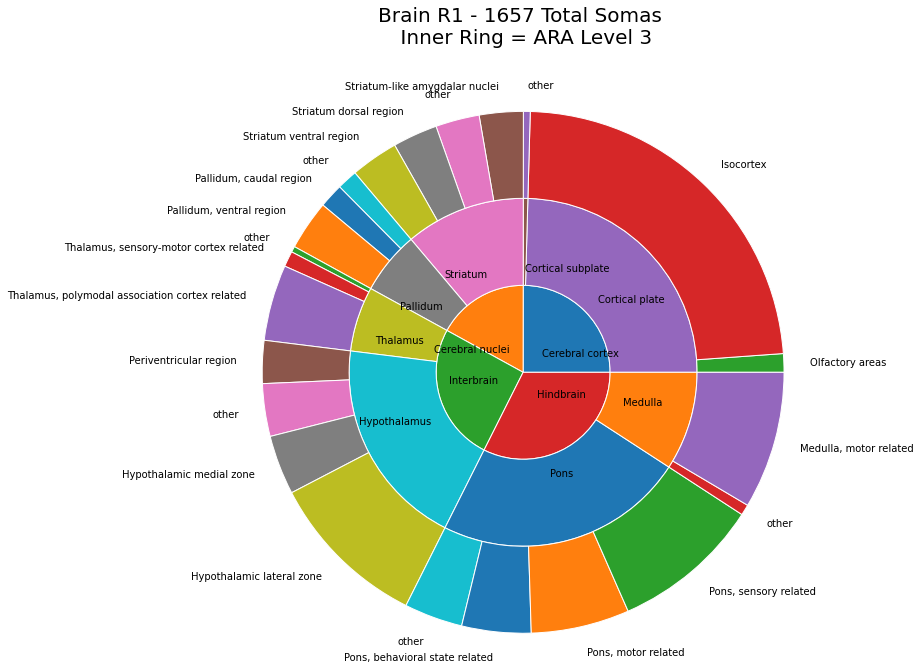

In [8]:
acros_4 = []
acros_5 = []
acros_6 = []
somas_4 = []
somas_5 = []
somas_6 = []
none = []

for node in G.nodes:
    if G.nodes[node]['st_level'] == 3:
        if G.nodes[node]['somas']>0:
            acros_4.append(G.nodes[node]['name'])
            somas_4.append(G.nodes[node]['somas'])

            children = G.successors(node)
            child_somas_counter = 0
            child_somas = []
            child_names = []

            for child in children:
                if G.nodes[child]['somas']>5:
                    child_names.append(G.nodes[child]['name'])
                    child_somas.append(G.nodes[child]['somas'])
                    child_somas_counter += G.nodes[child]['somas']


                    grandchildren = G.successors(child)
                    grandchild_somas_counter = 0
                    grandchild_somas = []
                    grandchild_names= []
                    for grandchild in grandchildren:
                        if G.nodes[grandchild]['somas']>5:
                            grandchild_names.append(G.nodes[grandchild]['name'])
                            grandchild_somas.append(G.nodes[grandchild]['somas'])
                            grandchild_somas_counter += G.nodes[grandchild]['somas']

                    if grandchild_somas_counter > G.nodes[child]['somas']:
                        raise ValueError()
                    elif grandchild_somas_counter < G.nodes[child]['somas']:
                        diff = G.nodes[child]['somas'] - grandchild_somas_counter
                        grandchild_names.append("other")
                        grandchild_somas.append(diff)

                    grandchild_somas, grandchild_names = sort_pairs(grandchild_somas, grandchild_names)
                    somas_6.extend(grandchild_somas)
                    acros_6.extend(grandchild_names)

            if child_somas_counter > G.nodes[node]['somas']:
                raise ValueError()
            elif child_somas_counter < G.nodes[node]['somas']:
                diff = G.nodes[node]['somas'] - child_somas_counter
                child_names.append("other")
                child_somas.append(diff)

            #child_somas, child_names = sort_pairs(child_somas, child_names)
            somas_5.extend(child_somas)
            acros_5.extend(child_names)



        else:
            none.append(G.nodes[node]['name'])



fig, ax = plt.subplots()

width = 1
ax.pie(somas_4, radius=1, labels = acros_4, labeldistance = 0.3,
        wedgeprops=dict(width=width, edgecolor='w'))

ax.pie(somas_5, radius=2, labels = acros_5, labeldistance = 0.6,
        wedgeprops=dict(width=width, edgecolor='w'))

ax.pie(somas_6, radius=3, labels = acros_6,
        wedgeprops=dict(width=width, edgecolor='w'))

plt.title(f"Brain R1 - {np.sum(somas_4)} Total Somas \n Inner Ring = ARA Level 3", pad=220, fontdict={'fontsize': 20})

Text(0.5, 1.0, 'Brain R1 - 3424 Total Somas \n Inner Ring = ARA Level 5')

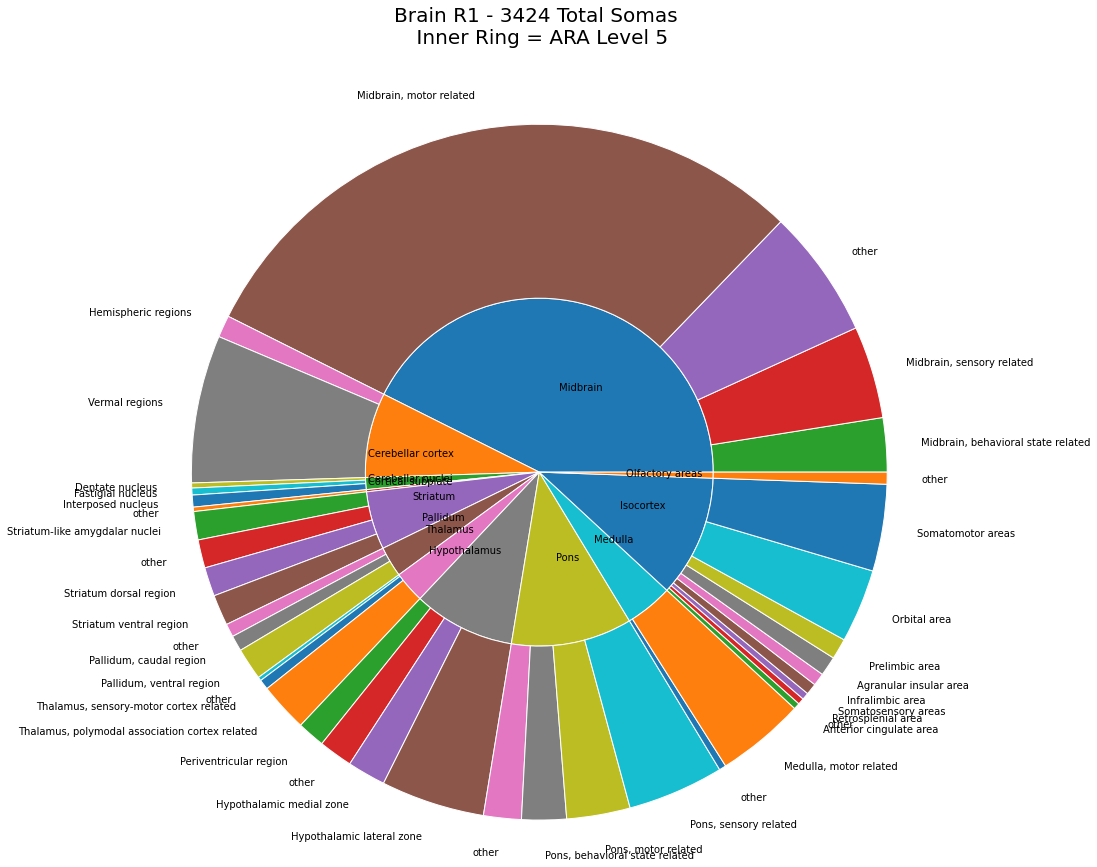

In [7]:
acros_4 = []
acros_5 = []
somas_4 = []
somas_5 = []
none = []

for node in G.nodes:
    if G.nodes[node]['st_level'] == 5:
        if G.nodes[node]['somas']>0:
            acros_4.append(G.nodes[node]['name'])
            somas_4.append(G.nodes[node]['somas'])

            children = G.successors(node)
            child_somas_counter = 0
            child_somas = []
            child_names = []

            for child in children:
                if G.nodes[child]['somas']>5:
                    child_names.append(G.nodes[child]['name'])
                    child_somas.append(G.nodes[child]['somas'])
                    child_somas_counter += G.nodes[child]['somas']

            if child_somas_counter > G.nodes[node]['somas']:
                raise ValueError()
            elif child_somas_counter < G.nodes[node]['somas']:
                diff = G.nodes[node]['somas'] - child_somas_counter
                child_names.append("other")
                child_somas.append(diff)

            child_somas, child_names = sort_pairs(child_somas, child_names)
            somas_5.extend(child_somas)
            acros_5.extend(child_names)



        else:
            none.append(G.nodes[node]['name'])



fig, ax = plt.subplots()

width = 2
ax.pie(somas_4, radius=width, labels = acros_4, labeldistance = 0.5,
        wedgeprops=dict(width=width, edgecolor='w'))

ax.pie(somas_5, radius=2*width, labels = acros_5, 
        wedgeprops=dict(width=width, edgecolor='w'))


plt.title(f"Brain R1 - {np.sum(somas_4)} Total Somas \n Inner Ring = ARA Level 5", pad=320, fontdict={'fontsize': 20})

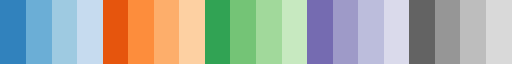

In [24]:
cmap

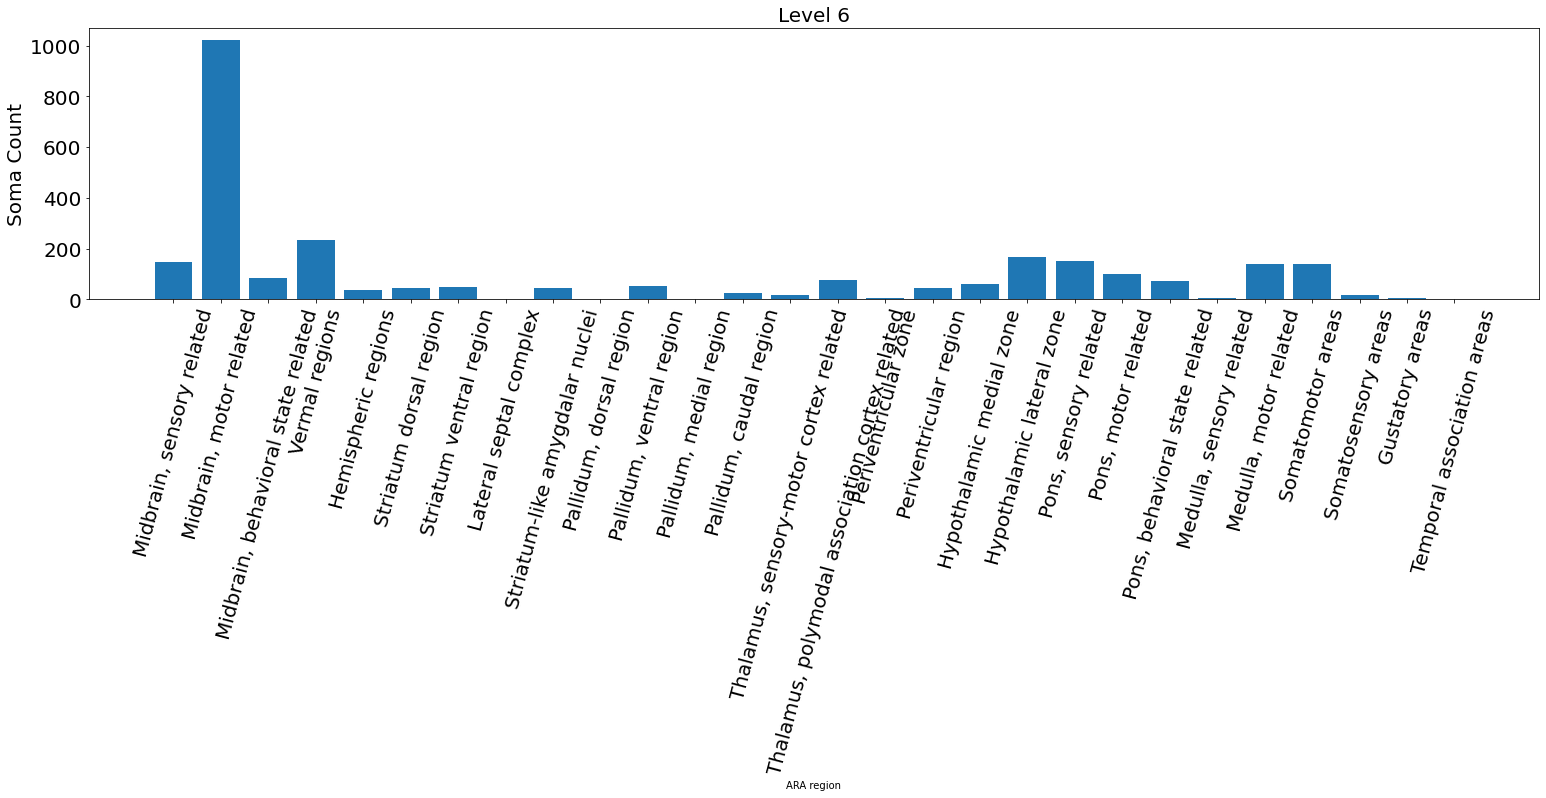

Areas with none detected: ['Medulla, behavioral state related', 'Auditory areas', 'Visual areas', 'Posterior parietal association areas', 'Hippocampal region', 'Retrohippocampal region']


In [5]:
acros = []
somas = []
none = []
lvl = 6

for node in G.nodes:
    if G.nodes[node]['st_level'] == lvl:
        if G.nodes[node]['somas']>0:
            acros.append(G.nodes[node]['name'])
            somas.append(G.nodes[node]['somas'])
        else:
            none.append(G.nodes[node]['name'])

volumes = np.multiply(somas, 6.7/(1000**3))
plt.bar(acros,somas)
plt.ylabel("Soma Count", fontsize=20)
plt.xlabel("ARA region")
plt.title(f"Level {lvl}", fontsize=20)
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)

fig = plt.gcf()
fig.set_size_inches(26, 5)
plt.show()

print(f"Areas with none detected: {none}")

In [45]:
nodes = []
for n in G.nodes:
    if G.nodes[n]["st_level"] <= 5:
        nodes.append(n)
len(nodes)
G2 = G.subgraph(nodes)

In [46]:
pos_dict = {}
label_dict = {}
for level in np.arange(12):
    counter = 0
    for n in G2.nodes:
        if G2.nodes[n]["st_level"] == level:
            pos_dict[n] = (100*counter, 11-level)
            counter += 1
            label_dict[n] = G2.nodes[n]["acronym"]

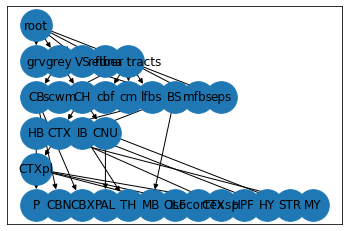

In [47]:
nx.draw_networkx(G2, pos_dict, labels = label_dict, node_size=1000)


In [48]:
net = Network(notebook=True)
net.from_nx(G2)
net.show("example.html") #only works on jupyter nb